# Read Dataset

The dataset that we are using is transaction data for online purchases collected from an ecommerce retailer.
The dataset contains 39,221 transactions, each comprising 5 properties that can be used to describe the transaction, as well as a binary “label” indicating whether this transaction is an instance of fraud—“1” if fraudulent, and “0” if not.

A sampke of the datset is shown as follows:

|||||||
| --- |--- |--- |--- |--- |--- |
| accountAgeDays | numItems | localTime | paymentMethod | paymentMethodAgeDays|label |
|196|1|4.962055|creditcard|5.10625|0|

This transaction was made through a user account that was created 196 days ago (accountAgeDays), 
and that the user purchased 1 item (numItems) at around 4:58 AM in the consumer’s local time (localTime). 
Payment was made through credit card (paymentMethod), 
and this method of payment was added about 5 days before the transaction (paymentMethodAgeDays). 
The label is 0, which indicates that this transaction is not fraudulent

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#read payment_fraud.csv
data = pd.read_csv('payment_fraud.csv')
data.head()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,label
0,29,1,4.745402,paypal,28.204861,0
1,725,1,4.742303,storecredit,0.000000,0
2,845,1,4.921318,creditcard,0.000000,0
3,503,1,4.886641,creditcard,0.000000,0
4,2000,1,5.040929,creditcard,0.000000,0


# Preprocess Dataset

## Data Cleaning

### Explore dataset

In [3]:
data.shape

(39221, 6)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39221 entries, 0 to 39220
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   accountAgeDays        39221 non-null  int64  
 1   numItems              39221 non-null  int64  
 2   localTime             39221 non-null  float64
 3   paymentMethod         39221 non-null  object 
 4   paymentMethodAgeDays  39221 non-null  float64
 5   label                 39221 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 1.8+ MB


In [5]:
data.describe()

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,label
count,39221.000000,39221.000000,39221.000000,39221.000000,39221.000000
mean,857.563984,1.084751,4.748232,122.641326,0.014278
std,804.788212,0.566899,0.389360,283.569177,0.118636
min,1.000000,1.000000,0.421214,0.000000,0.000000
25%,72.000000,1.000000,4.742303,0.000000,0.000000
50%,603.000000,1.000000,4.886641,0.012500,0.000000
75%,1804.000000,1.000000,4.962055,87.510417,0.000000
max,2000.000000,29.000000,5.040929,1999.580556,1.000000


In [8]:
#drop duplicated rows
data.duplicated().sum()#.any()

5726

In [10]:
data.drop_duplicates(inplace = True)

In [11]:
data.shape

(33495, 6)

In [13]:
#separer les features du label
X = data.drop('label', axis = 1)
y = data['label']

In [14]:
X.head()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays
0,29,1,4.745402,paypal,28.204861
1,725,1,4.742303,storecredit,0.000000
2,845,1,4.921318,creditcard,0.000000
3,503,1,4.886641,creditcard,0.000000
4,2000,1,5.040929,creditcard,0.000000


In [15]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [16]:
#columns
X.columns

Index(['accountAgeDays', 'numItems', 'localTime', 'paymentMethod',
       'paymentMethodAgeDays'],
      dtype='object')

In [18]:
#cat_col
cat_col = [col for col in X.columns if X[col].dtype == object]
cat_col

['paymentMethod']

In [19]:
#num_col
num_col = [col for col in X.columns if X[col].dtype != object]
num_col

['accountAgeDays', 'numItems', 'localTime', 'paymentMethodAgeDays']

In [27]:
#unique values
X['paymentMethod'].unique()

array(['paypal', 'storecredit', 'creditcard'], dtype=object)

### Handling missing data

In [30]:
#check percentage of null values
100*X.isna().sum()/len(X)

accountAgeDays          0.0
numItems                0.0
localTime               0.0
paymentMethod           0.0
paymentMethodAgeDays    0.0
dtype: float64

### Handling outliers

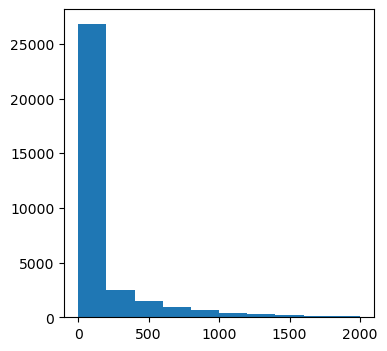

In [32]:
#histogrm of paymentMethodAgeDays
plt.figure(figsize = (4,4))
plt.hist(X['paymentMethodAgeDays'])
plt.show()

In [36]:
# calculate the mean of paymentMethodAgeDays
moy = X['paymentMethodAgeDays'].mean()
moy

143.10997648903106

In [38]:
# keep values <= mean (# Drop the outliers)

X = X[X['paymentMethodAgeDays']<= moy]

In [43]:
data = data[data['paymentMethodAgeDays']<= moy]

In [44]:
data.shape

(25538, 6)

In [39]:
X.shape

(25538, 5)

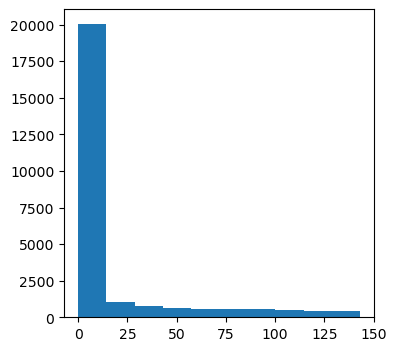

In [40]:
plt.figure(figsize = (4,4))
plt.hist(X['paymentMethodAgeDays'])
plt.show()

## Check if Dataset is imbalanced

In [45]:
#nb of samples in class Non Fraud (label = 0)
n0 = y[y==0].shape
n0

(33201,)

In [46]:
#nb of samples in class 'Fraud' (label = 1)
n1 = y[y==1].shape
n1

(294,)

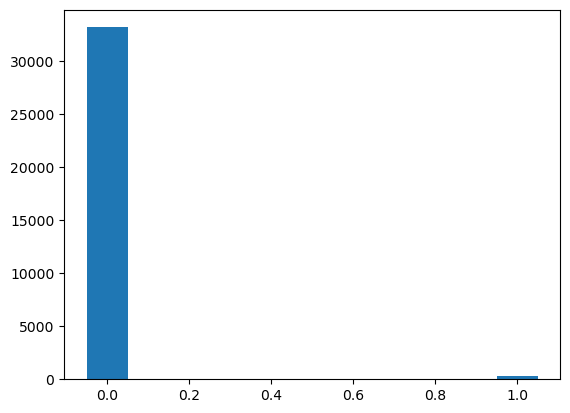

In [49]:
plt.bar([0,1], [n0[0],n1[0]], width = 0.1)
plt.show()

In [50]:
#select a sample of non frauds of the same size of the frauds dataset
df_non_fraud = data[data['label']==0].sample(n1[0])
df_non_fraud.shape

(294, 6)

In [51]:
#select only the frauds samples
df_fraud = data[data['label']==1]
df_fraud.shape

(294, 6)

In [52]:
#Concatenate both subsets
bal_data = pd.concat([df_non_fraud, df_fraud])
bal_data.shape

(588, 6)

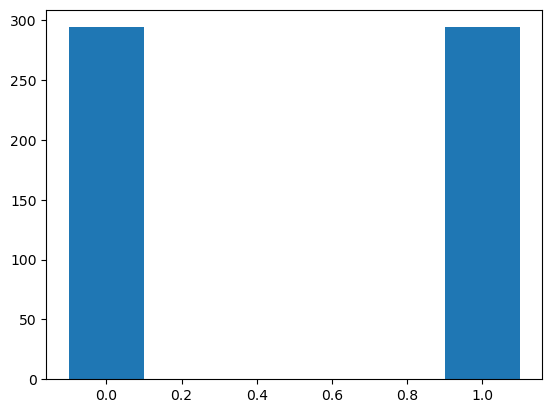

In [55]:
#nb of samples in class 0
n0 =len(bal_data[bal_data['label']==0])

#nb of samples in class 'Fraud'
n1 =len(bal_data[bal_data['label']==1])

plt.bar([0,1], [n0,n1], width = 0.2)
plt.show()

## Data Transformation

In [56]:
#scale 'paymentMethodAgeDays', 'accountAgeDays','numItems','localTime'
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

bal_data[num_col] = scaler.fit_transform(bal_data[num_col])

In [57]:
bal_data[num_col].mean()

accountAgeDays          5.728600e-16
numItems                1.026579e-15
localTime               5.422722e-16
paymentMethodAgeDays   -1.023935e-15
dtype: float64

In [58]:
bal_data[num_col].std()

accountAgeDays          1.000851
numItems                1.000851
localTime               1.000851
paymentMethodAgeDays    1.000851
dtype: float64

### Convert categorical data to numercial

In [61]:
#One hot Encoding
bal_data_enc = pd.get_dummies(bal_data, columns = cat_col, dtype = 'int')
bal_data_enc.head()

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,label,paymentMethod_creditcard,paymentMethod_paypal,paymentMethod_storecredit
7153,2.331524,-0.32719,-0.227685,-0.351518,0,0,1,0
29804,0.704065,-0.32719,0.724617,-0.351518,0,1,0,0
26631,2.570197,-0.32719,-0.349217,-0.351518,0,1,0,0
14662,0.386902,-0.32719,0.471230,-0.351518,0,1,0,0
16283,-0.538956,-0.32719,0.471230,0.069351,0,1,0,0


In [63]:
#separate features and labels
X = bal_data_enc.drop('label', axis = 1)
y = bal_data_enc['label']

In [64]:
X.shape

(588, 7)

In [65]:
y.shape

(588,)

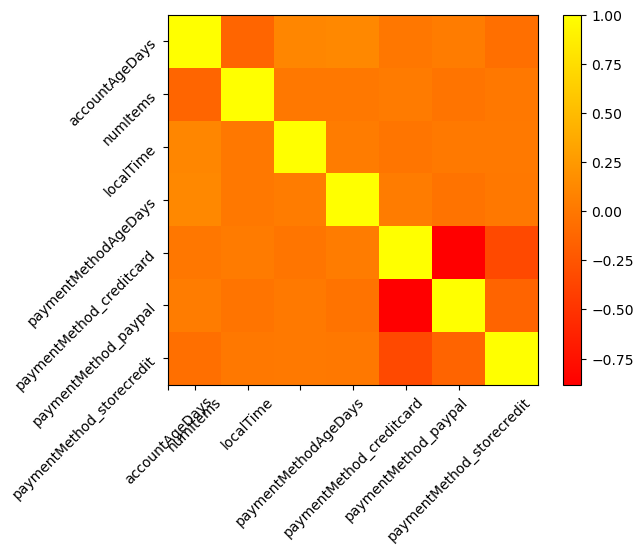

In [80]:
#correlation matrix
corr = X.corr()

plt.imshow(corr, cmap ='autumn')
plt.colorbar()
plt.xticks([-0.5,0,1,2,3,4,5], X.columns, rotation = 45)
plt.yticks(range(7), X.columns, rotation = 45)

plt.show()

### Split training and testing dataset

In [81]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)#, shuffle  = False)

In [91]:
y.head()

7153     0
29804    0
26631    0
14662    0
16283    0
Name: label, dtype: int64

In [92]:
y.tail()

38295    1
38344    1
38796    1
39111    1
39183    1
Name: label, dtype: int64

In [82]:
x_train.shape

(470, 7)

In [83]:
y_train.shape

(470,)

# Logistic Regression

In [84]:
from sklearn.linear_model import LogisticRegression

In [85]:
# Initialize and train classifier model
clf = LogisticRegression()

In [86]:
clf.fit(x_train, y_train)

LogisticRegression()

In [93]:
# Make predictions on test set
y_pred = clf.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1], dtype=int64)

In [89]:
y_test.to_numpy()

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1], dtype=int64)

## Performance Model Evaluation

In [94]:
# Compare test set predictions with ground truth labels

#accuracy score

from sklearn.metrics import accuracy_score
print(round(accuracy_score(y_test, y_pred)*100,2))

91.53


In [95]:
#f1 score
from sklearn.metrics import f1_score
print(round(f1_score(y_test, y_pred)*100,2))

93.51


In [97]:
#confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
cm

array([[36, 10],
       [ 0, 72]], dtype=int64)

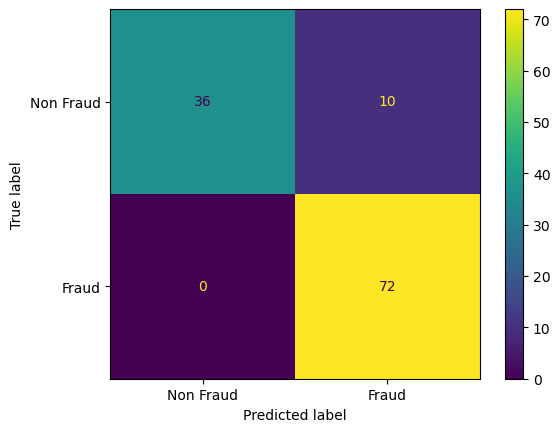

In [100]:
disp = ConfusionMatrixDisplay(cm, display_labels = ['Non Fraud','Fraud'])
disp.plot()
plt.show()

In [171]:
#tn, fp, fn, tp 


41 19 0 58


In [177]:
#verify accuracy


83.9

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


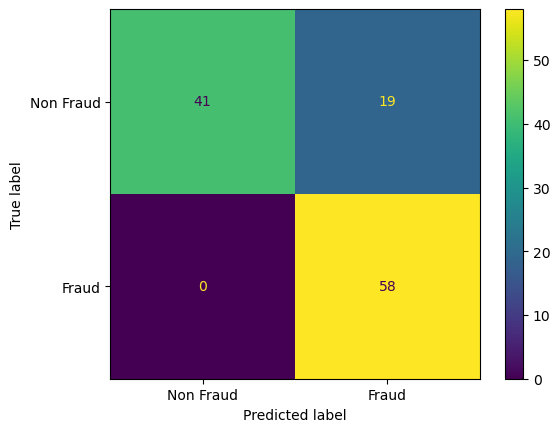

In [122]:
#Plot confusion matrix



Text(0, 0.5, 'True Positive Rate')

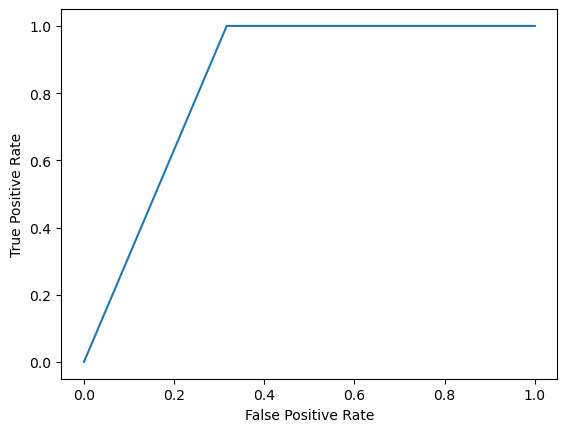

In [134]:
#plot the roc_curve(y_test, y_pred): fpr, tpr


## SVM

In [144]:
#train an  SVM SVC classifier




SVC()

In [182]:
#evaluate the testing accuracy


83.9


In [148]:
# predict y_test


array([1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

Test Accuracy of SVM Algorithm: 79.66%


In [149]:
# print the confusion_matrix


[[36 24]
 [ 0 58]]
